# Import Packages

In [1]:
import pandas as pd
import numpy as np

# Load and visualize weekly stock returns

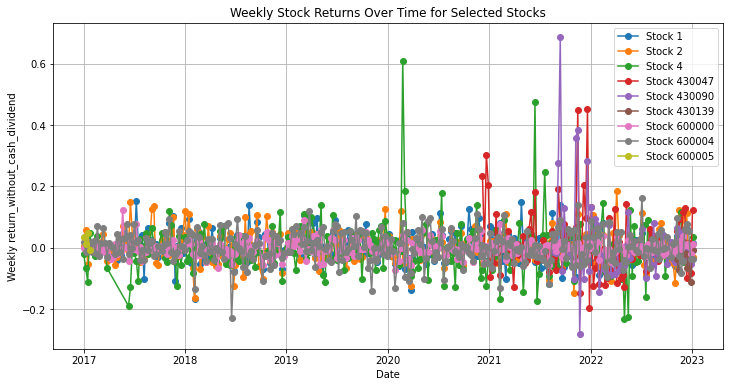

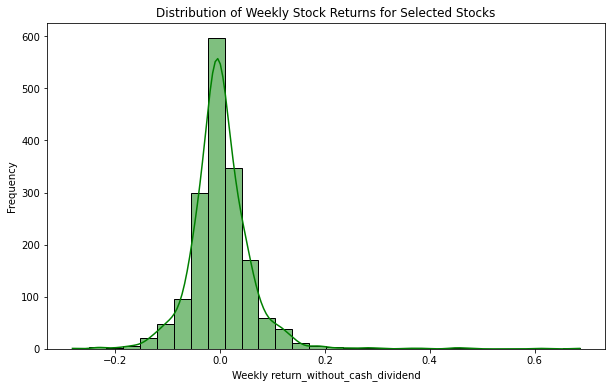

c:\Users\Darren\OneDrive\Desktop\fma2\scripts\load_weekly_returns.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


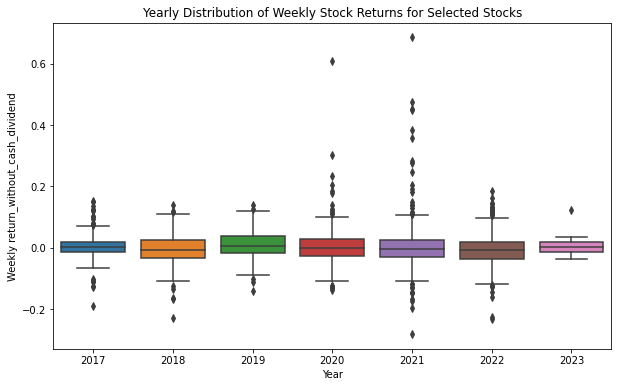

In [2]:
%run scripts/load_weekly_returns.py

In [3]:
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date
0,1,2017-01,0.003297,4,2017-01-02
1,1,2017-02,0.003286,4,2017-01-09
2,1,2017-03,0.006550,4,2017-01-16
3,1,2017-04,0.011931,4,2017-01-23
4,1,2017-05,-0.007503,4,2017-01-30
...,...,...,...,...,...
1206568,873527,2022-49,-0.005513,64,2022-12-05
1206569,873527,2022-50,-0.024390,64,2022-12-12
1206570,873527,2022-51,-0.019318,64,2022-12-19
1206571,873527,2022-52,-0.067207,64,2022-12-26


In [4]:
# Drop column 'Date'
weekly_returns = weekly_returns.drop('Date', axis=1)
weekly_returns.columns

Index(['stock_code', 'trading_week', 'return_without_cash_dividend',
       'Markettype'],
      dtype='object')

# Load fama french factors

In [5]:
%run scripts/load_ff_factors.py

In [6]:
ff_factors

,MarkettypeID,trading_week,RiskPremium1,SMB1,HML1,Markettype
10,P9701,2017-01,0.018354,0.004408,0.000229,1
12,P9703,2017-01,0.014632,0.003898,0.003630,4
23,P9701,2017-02,-0.007301,-0.026808,0.010977,1
25,P9703,2017-02,-0.029871,-0.013320,0.007733,4
36,P9701,2017-03,0.006478,-0.032321,0.013063,1
...,...,...,...,...,...,...
5268,P9701,2022-51,-0.034304,-0.015656,0.001207,1
5269,P9703,2022-51,-0.043007,-0.001229,-0.005524,4
5280,P9718,2022-52,-0.005621,0.017056,-0.000535,64
5291,P9703,2022-52,0.010251,0.004053,-0.005483,4


# Load risk free rate dataset

In [7]:
# Load csv file
risk_free_rate = pd.read_excel("risk_free_rates/weekly_risk_free_rate.xlsx")
risk_free_rate

,trading_date_yw,risk_free_return
0,2017-01-01,0.000571
1,2017-01-08,0.000738
2,2017-01-15,0.000543
3,2017-01-22,0.000774
4,2017-01-29,0.000802
...,...,...
307,2022-11-26,0.000444
308,2022-12-03,0.000471
309,2022-12-10,0.000477
310,2022-12-17,0.000459


In [8]:
# Convert into datetime object
risk_free_rate['trading_date_yw'] = pd.to_datetime(risk_free_rate['trading_date_yw'])
# Add formatted week-year column
risk_free_rate['week_year'] = risk_free_rate['trading_date_yw'].dt.strftime('%Y-%U')
risk_free_rate

,trading_date_yw,risk_free_return,week_year
0,2017-01-01,0.000571,2017-01
1,2017-01-08,0.000738,2017-02
2,2017-01-15,0.000543,2017-03
3,2017-01-22,0.000774,2017-04
4,2017-01-29,0.000802,2017-05
...,...,...,...
307,2022-11-26,0.000444,2022-47
308,2022-12-03,0.000471,2022-48
309,2022-12-10,0.000477,2022-49
310,2022-12-17,0.000459,2022-50


# FF3 Construction

## I. Calculate market return

In [9]:
# Calculate weekly market returns as the mean value of weekly returns of all mainboard stocks
market_return = weekly_returns.groupby('trading_week')['return_without_cash_dividend'].mean().reset_index()
market_return = market_return.rename(columns={'return_without_cash_dividend': 'market_return'})

market_return

,trading_week,market_return
0,2017-01,0.018377
1,2017-02,-0.032801
2,2017-03,-0.015996
3,2017-04,0.018515
4,2017-05,-0.002261
...,...,...
303,2022-49,0.028340
304,2022-50,0.003581
305,2022-51,-0.014400
306,2022-52,-0.048004


## II. Merge necessary dataframes

In [10]:
# Merging market returns
weekly_returns = pd.merge(weekly_returns, 
                          market_return, 
                          left_on='trading_week', 
                          right_on='trading_week',
                          how="left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return
0,1,2017-01,0.003297,4,0.018377
1,1,2017-02,0.003286,4,-0.032801
2,1,2017-03,0.006550,4,-0.015996
3,1,2017-04,0.011931,4,0.018515
4,1,2017-05,-0.007503,4,-0.002261
...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,0.028340
889067,873527,2022-50,-0.024390,64,0.003581
889068,873527,2022-51,-0.019318,64,-0.014400
889069,873527,2022-52,-0.067207,64,-0.048004


In [11]:
# Merging FF3 factors
weekly_returns = pd.merge(weekly_returns, 
                          ff_factors, 
                          on=['trading_week', 'Markettype'], 
                          how="left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1
0,1,2017-01,0.003297,4,0.018377,P9703,0.014632,0.003898,0.003630
1,1,2017-02,0.003286,4,-0.032801,P9703,-0.029871,-0.013320,0.007733
2,1,2017-03,0.006550,4,-0.015996,P9703,-0.013231,-0.015845,0.013383
3,1,2017-04,0.011931,4,0.018515,P9703,0.017210,0.002821,0.002388
4,1,2017-05,-0.007503,4,-0.002261,P9703,-0.004008,0.000574,-0.003468
...,...,...,...,...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,0.028340,P9718,-0.019045,-0.000498,0.001611
889067,873527,2022-50,-0.024390,64,0.003581,P9718,-0.005141,-0.020526,0.002177
889068,873527,2022-51,-0.019318,64,-0.014400,P9718,-0.054075,0.003149,0.026432
889069,873527,2022-52,-0.067207,64,-0.048004,P9718,-0.005621,0.017056,-0.000535


In [12]:
# Merging risk free rate
weekly_returns = pd.merge(weekly_returns, 
                          risk_free_rate, 
                          left_on="trading_week", 
                          right_on="week_year", how="left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1,trading_date_yw,risk_free_return,week_year
0,1,2017-01,0.003297,4,0.018377,P9703,0.014632,0.003898,0.003630,2017-01-01,0.000571,2017-01
1,1,2017-02,0.003286,4,-0.032801,P9703,-0.029871,-0.013320,0.007733,2017-01-08,0.000738,2017-02
2,1,2017-03,0.006550,4,-0.015996,P9703,-0.013231,-0.015845,0.013383,2017-01-15,0.000543,2017-03
3,1,2017-04,0.011931,4,0.018515,P9703,0.017210,0.002821,0.002388,2017-01-22,0.000774,2017-04
4,1,2017-05,-0.007503,4,-0.002261,P9703,-0.004008,0.000574,-0.003468,2017-01-29,0.000802,2017-05
...,...,...,...,...,...,...,...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,0.028340,P9718,-0.019045,-0.000498,0.001611,2022-12-10,0.000477,2022-49
889067,873527,2022-50,-0.024390,64,0.003581,P9718,-0.005141,-0.020526,0.002177,2022-12-17,0.000459,2022-50
889068,873527,2022-51,-0.019318,64,-0.014400,P9718,-0.054075,0.003149,0.026432,2022-12-24,0.000432,2022-51
889069,873527,2022-52,-0.067207,64,-0.048004,P9718,-0.005621,0.017056,-0.000535,NaT,NaN,NaN


In [13]:
# Ensure excess returns are calculated against the risk-free rate
weekly_returns['stock_excess_return'] = weekly_returns['return_without_cash_dividend'] - weekly_returns['risk_free_return']
weekly_returns['market_excess_return'] = weekly_returns['market_return'] - weekly_returns['risk_free_return']

# Drop missing values
weekly_returns.dropna(inplace=True)

## III. First regression

In [14]:
import statsmodels.api as sm

In [15]:
# Filter the period
period_data = weekly_returns[(weekly_returns['trading_week'] >= '2017-01') & (weekly_returns['trading_week'] <= '2018-52')]
period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1,trading_date_yw,risk_free_return,week_year,stock_excess_return,market_excess_return
0,1,2017-01,0.003297,4,0.018377,P9703,0.014632,0.003898,0.003630,2017-01-01,0.000571,2017-01,0.002726,0.017806
1,1,2017-02,0.003286,4,-0.032801,P9703,-0.029871,-0.013320,0.007733,2017-01-08,0.000738,2017-02,0.002548,-0.033539
2,1,2017-03,0.006550,4,-0.015996,P9703,-0.013231,-0.015845,0.013383,2017-01-15,0.000543,2017-03,0.006007,-0.016540
3,1,2017-04,0.011931,4,0.018515,P9703,0.017210,0.002821,0.002388,2017-01-22,0.000774,2017-04,0.011157,0.017742
4,1,2017-05,-0.007503,4,-0.002261,P9703,-0.004008,0.000574,-0.003468,2017-01-29,0.000802,2017-05,-0.008305,-0.003064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869398,603999,2018-47,-0.015152,1,-0.053329,P9701,-0.031132,-0.019332,0.006994,2018-11-26,0.000511,2018-47,-0.015663,-0.053840
869399,603999,2018-48,-0.055769,1,-0.002281,P9701,0.003699,-0.005775,0.003101,2018-12-03,0.000506,2018-48,-0.056275,-0.002787
869400,603999,2018-49,0.120163,1,0.015767,P9701,0.005052,0.010740,-0.005688,2018-12-10,0.000510,2018-49,0.119653,0.015257
869401,603999,2018-50,-0.067273,1,-0.018287,P9701,-0.004528,-0.016984,0.002323,2018-12-17,0.000551,2018-50,-0.067824,-0.018838


In [16]:
# Initialize empty dictionaries
beta_rmrf = {}
beta_smb = {}
beta_hml = {}

# Loop through the stock_code
for stock_code in period_data['stock_code'].unique():
    stock_data = period_data[period_data['stock_code'] == stock_code]
    
    # Define independent and dependent variables
    stock_excess_returns = stock_data['return_without_cash_dividend'] - stock_data['risk_free_return']
    market_excess_returns = stock_data['market_return'] - stock_data['risk_free_return']
    
    # Create a DataFrame for independent variables
    X = pd.DataFrame({
        'Market Excess Returns': market_excess_returns,
        'SMB': stock_data['SMB1'],
        'HML': stock_data['HML1']
    })
    
    # Add a constant to the DataFrame
    X = sm.add_constant(X)
    Y = stock_excess_returns
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Append parameters
    beta_rmrf[stock_code] = model.params[1]
    beta_smb[stock_code] = model.params[2]
    beta_hml[stock_code] = model.params[3]

# Convert result into dataframe
betas_rmrf_df = pd.DataFrame(list(beta_rmrf.items()), columns=['stock_code', 'Beta_RMRF'])
betas_smb_df = pd.DataFrame(list(beta_smb.items()), columns=['stock_code', 'Beta_SMB'])
betas_hml_df = pd.DataFrame(list(beta_hml.items()), columns=['stock_code', 'Beta_HML'])
betas_df = pd.concat([betas_rmrf_df, betas_smb_df, betas_hml_df], axis=1)
betas_df = betas_df.T.drop_duplicates().T
betas_df

,stock_code,Beta_RMRF,Beta_SMB,Beta_HML
0,1.0,0.825249,-1.684909,1.607597
1,2.0,1.134167,-1.674518,1.805766
2,4.0,0.380373,0.613652,-0.938555
3,5.0,0.951808,0.245865,-0.071036
4,6.0,1.387372,-0.888870,0.139496
...,...,...,...,...
2827,603993.0,1.834853,-0.470408,1.262785
2828,603996.0,1.207027,-0.397455,-0.387152
2829,603997.0,0.682693,0.401399,-0.055195
2830,603998.0,1.364629,-0.499554,-0.334916


In [17]:
# Merge with weekly returns dataframe
weekly_returns = pd.merge(weekly_returns, betas_df, on='stock_code', how='left')

In [18]:
# Drop missing values
weekly_returns = weekly_returns.dropna()

In [19]:
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1,trading_date_yw,risk_free_return,week_year,stock_excess_return,market_excess_return,Beta_RMRF,Beta_SMB,Beta_HML
0,1,2017-01,0.003297,4,0.018377,P9703,0.014632,0.003898,0.003630,2017-01-01,0.000571,2017-01,0.002726,0.017806,0.825249,-1.684909,1.607597
1,1,2017-02,0.003286,4,-0.032801,P9703,-0.029871,-0.013320,0.007733,2017-01-08,0.000738,2017-02,0.002548,-0.033539,0.825249,-1.684909,1.607597
2,1,2017-03,0.006550,4,-0.015996,P9703,-0.013231,-0.015845,0.013383,2017-01-15,0.000543,2017-03,0.006007,-0.016540,0.825249,-1.684909,1.607597
3,1,2017-04,0.011931,4,0.018515,P9703,0.017210,0.002821,0.002388,2017-01-22,0.000774,2017-04,0.011157,0.017742,0.825249,-1.684909,1.607597
4,1,2017-05,-0.007503,4,-0.002261,P9703,-0.004008,0.000574,-0.003468,2017-01-29,0.000802,2017-05,-0.008305,-0.003064,0.825249,-1.684909,1.607597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835969,603999,2022-47,0.021484,1,0.010169,P9701,0.011153,-0.016554,0.044766,2022-11-26,0.000444,2022-47,0.021040,0.009725,1.115106,0.942827,0.639333
835970,603999,2022-48,0.005736,1,-0.009893,P9701,0.016161,0.009937,-0.024400,2022-12-03,0.000471,2022-48,0.005265,-0.010364,1.115106,0.942827,0.639333
835971,603999,2022-49,0.043726,1,0.028340,P9701,0.018248,-0.021064,-0.003514,2022-12-10,0.000477,2022-49,0.043249,0.027863,1.115106,0.942827,0.639333
835972,603999,2022-50,-0.023679,1,0.003581,P9701,-0.009908,-0.005379,-0.004614,2022-12-17,0.000459,2022-50,-0.024138,0.003122,1.115106,0.942827,0.639333


In [20]:
import os

In [21]:
# Save result data
# Specify the directory
folder_name = 'results'
file_name = 'FF3_first_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
weekly_returns.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\FF3_first_regression.csv' successfully.


## IV. Second Regression

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def apply_pca_to_betas(data, visualize=True):
    # Standardize the data
    scaler = StandardScaler()
    beta_values = data[['Beta_RMRF', 'Beta_SMB', 'Beta_HML']]
    beta_values_scaled = scaler.fit_transform(beta_values)

    # Apply PCA and keep all components initially to evaluate them
    pca = PCA()
    principal_components = pca.fit_transform(beta_values_scaled)

    # Adding the principal component scores to the original DataFrame
    data['PCA_Score'] = principal_components[:, 0]

    # Creating portfolios based on the PCA scores
    data['Portfolio'] = pd.qcut(data['PCA_Score'], q=10, labels=False) + 1

    if visualize:
        # Scree Plot to show explained variance ratio
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
        plt.xlabel('Component Number')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot of PCA')

        # Cumulative Explained Variance
        plt.subplot(1, 2, 2)
        plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Cumulative Explained Variance by PCA')
        plt.tight_layout()
        plt.show()

        # Loadings Plot
        loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
        plt.figure(figsize=(10, 4))
        plt.bar(range(1, len(pca.components_[0]) + 1), loadings[:, 0], tick_label=['Beta_RMRF', 'Beta_SMB', 'Beta_HML'])
        plt.xlabel('Variables')
        plt.ylabel('Loadings for PC1')
        plt.title('PCA Loadings Plot')
        plt.show()

        # Detailed scatter plots for each beta
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        sns.scatterplot(x=beta_values_scaled[:, 0], y=data['PCA_Score'], hue=data['Portfolio'], palette='viridis')
        plt.title('Standardized Beta_RMRF vs. PCA Score')
        plt.xlabel('Standardized Beta_RMRF')
        plt.ylabel('PCA Score')

        plt.subplot(3, 1, 2)
        sns.scatterplot(x=beta_values_scaled[:, 1], y=data['PCA_Score'], hue=data['Portfolio'], palette='viridis')
        plt.title('Standardized Beta_SMB vs. PCA Score')
        plt.xlabel('Standardized Beta_SMB')
        plt.ylabel('PCA Score')

        plt.subplot(3, 1, 3)
        sns.scatterplot(x=beta_values_scaled[:, 2], y=data['PCA_Score'], hue=data['Portfolio'], palette='viridis')
        plt.title('Standardized Beta_HML vs. PCA Score')
        plt.xlabel('Standardized Beta_HML')
        plt.ylabel('PCA Score')

        plt.tight_layout()
        plt.show()
    
    return data

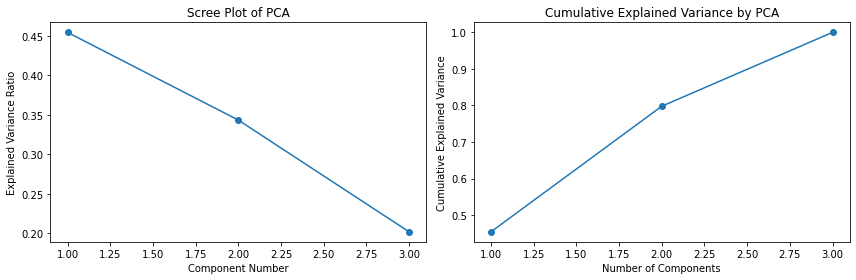

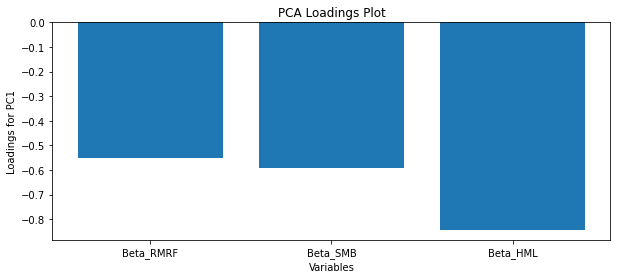

C:\Users\Darren\AppData\Local\Temp/ipykernel_11844/376014194.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Darren\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


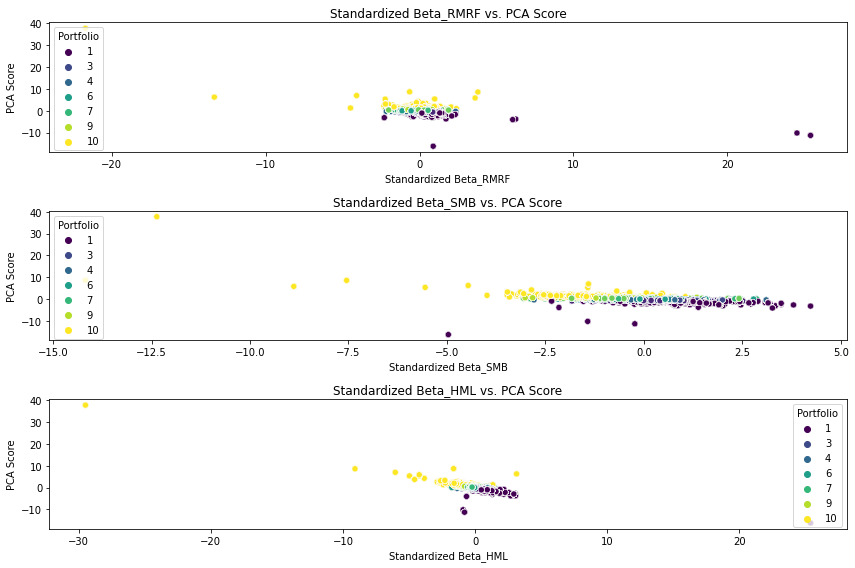

In [24]:
# Load your data
second_period_data = weekly_returns[(weekly_returns['trading_week'] >= '2019-01') & (weekly_returns['trading_week'] <= '2020-52')].copy()

# Apply PCA and visualize the results
second_period_data = apply_pca_to_betas(second_period_data)

In [25]:
second_period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1,trading_date_yw,risk_free_return,week_year,stock_excess_return,market_excess_return,Beta_RMRF,Beta_SMB,Beta_HML,PCA_Score,Portfolio
101,1,2019-01,0.039446,4,0.017286,P9703,0.011585,0.012594,0.008959,2019-01-08,0.000500,2019-01,0.038946,0.016787,0.825249,-1.684909,1.607597,0.417140,8
102,1,2019-02,0.046154,4,0.030281,P9703,0.028457,0.008451,-0.005102,2019-01-15,0.000498,2019-02,0.045656,0.029783,0.825249,-1.684909,1.607597,0.417140,8
103,1,2019-03,0.022549,4,0.002105,P9703,0.011165,-0.019032,-0.005254,2019-01-22,0.000493,2019-03,0.022056,0.001611,0.825249,-1.684909,1.607597,0.417140,8
104,1,2019-04,0.054650,4,-0.005404,P9703,-0.001165,-0.003737,0.002785,2019-01-29,0.000484,2019-04,0.054166,-0.005888,0.825249,-1.684909,1.607597,0.417140,8
105,1,2019-05,0.018182,4,-0.032086,P9703,-0.001701,-0.048671,-0.000971,2019-02-05,0.000482,2019-05,0.017700,-0.032568,0.825249,-1.684909,1.607597,0.417140,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835873,603999,2020-47,0.037866,1,0.022743,P9701,0.023169,0.003276,0.010878,2020-11-25,0.000585,2020-47,0.037281,0.022158,1.115106,0.942827,0.639333,-1.051468,1
835874,603999,2020-48,-0.009950,1,-0.008108,P9701,0.015484,-0.022792,0.023774,2020-12-02,0.000584,2020-48,-0.010534,-0.008692,1.115106,0.942827,0.639333,-1.051468,1
835875,603999,2020-49,0.031826,1,0.013901,P9701,0.008350,0.001170,-0.019737,2020-12-09,0.000573,2020-49,0.031253,0.013328,1.115106,0.942827,0.639333,-1.051468,1
835876,603999,2020-50,-0.058442,1,-0.038091,P9701,-0.033051,0.001032,-0.011473,2020-12-16,0.000549,2020-50,-0.058991,-0.038640,1.115106,0.942827,0.639333,-1.051468,1


In [26]:
# Construct portfolio return
portfolio_returns = second_period_data.groupby(['trading_week', 'Portfolio']).apply(
    lambda x: (x['return_without_cash_dividend']).mean() - x['risk_free_return'].mean()
).reset_index(name='portfolio_return')

portfolio_returns

,trading_week,Portfolio,portfolio_return
0,2019-01,1,0.023561
1,2019-01,2,0.028541
2,2019-01,3,0.023907
3,2019-01,4,0.026236
4,2019-01,5,0.022703
...,...,...,...
995,2020-51,6,0.002248
996,2020-51,7,-0.001889
997,2020-51,8,0.012797
998,2020-51,9,0.009510


In [27]:
# Merge market return and risk free return
rf_rm = weekly_returns[['trading_week', 'market_return', 'risk_free_return']].drop_duplicates()
portfolio_returns = pd.merge(portfolio_returns, rf_rm, on = "trading_week", how = "left")
portfolio_returns

,trading_week,Portfolio,portfolio_return,market_return,risk_free_return
0,2019-01,1,0.023561,0.017286,0.000500
1,2019-01,2,0.028541,0.017286,0.000500
2,2019-01,3,0.023907,0.017286,0.000500
3,2019-01,4,0.026236,0.017286,0.000500
4,2019-01,5,0.022703,0.017286,0.000500
...,...,...,...,...,...
995,2020-51,6,0.002248,0.003356,0.000509
996,2020-51,7,-0.001889,0.003356,0.000509
997,2020-51,8,0.012797,0.003356,0.000509
998,2020-51,9,0.009510,0.003356,0.000509


In [28]:
# Drop missing values
portfolio_returns.dropna(inplace=True)

In [29]:
# Initialize results
results = []

# Loop through the portfolios
for portfolio in portfolio_returns['Portfolio'].unique():
    portfolio_data = portfolio_returns[portfolio_returns['Portfolio'] == portfolio]
    
    # Define independent and dependent variables
    port_excess_returns = portfolio_data['portfolio_return'] - portfolio_data['risk_free_return']
    market_excess_returns = portfolio_data['market_return'] - portfolio_data['risk_free_return']
    
    # Create a DataFrame for independent variables
    X = sm.add_constant(market_excess_returns)
    Y = port_excess_returns
    model = sm.OLS(Y, X).fit()
    
    # Define result parameters
    alpha = model.params['const']
    beta = model.params[0]
    t_alpha = model.tvalues['const']
    t_beta = model.tvalues[0]
    p_alpha = model.pvalues['const']
    p_beta = model.pvalues[0]
    r_squared = model.rsquared
    
    # Append to empty list
    results.append({
        'Portfolio': portfolio,
        'alpha': alpha,
        't_alpha': t_alpha,
        'p_alpha': p_alpha,
        'beta': beta,
        't_beta': t_beta,
        'p_beta': p_beta,
        'R_squared': r_squared
    })

# Output result as a dataframe
results_df = pd.DataFrame(results)
results_df.rename(columns={
    'alpha': 'αp',
    't_alpha': 't-value αp',
    'p_alpha': 'Sign. αp',
    'beta': 'βp',
    't_beta': 't-value βp',
    'p_beta': 'Sign. βp',
    'R_squared': 'R²'
}, inplace=True)

In [30]:
results_df

,Portfolio,αp,t-value αp,Sign. αp,βp,t-value βp,Sign. βp,R²
0,1,-0.001847,-3.851564,0.000209,1.122898,74.327517,5.397499e-88,0.982570
1,2,-0.001306,-2.833339,0.005593,1.047177,72.126035,9.751869e-87,0.981510
2,3,-0.001145,-2.753933,0.007019,1.050183,80.214024,3.469821e-91,0.984998
3,4,-0.000746,-1.864937,0.065182,1.021744,81.116095,1.178526e-91,0.985325
4,5,-0.000991,-2.937080,0.004130,0.992710,93.373644,1.438232e-97,0.988885
5,6,-0.001151,-2.991585,0.003511,0.969202,79.948431,4.779237e-91,0.984899
6,7,-0.000886,-2.630284,0.009908,0.960298,90.485787,3.018247e-96,0.988172
7,8,-0.000724,-2.205199,0.029778,0.985279,95.297351,1.991824e-98,0.989324
8,9,0.000436,0.849878,0.397464,0.905266,56.008169,3.151812e-76,0.969706
9,10,0.001487,1.668232,0.098462,0.901561,32.123474,7.857686e-54,0.913268


In [31]:
# Save result df
# Specify the directory
folder_name = 'results'
file_name = 'FF3_second_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
results_df.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\FF3_second_regression.csv' successfully.


## V. Third Regression

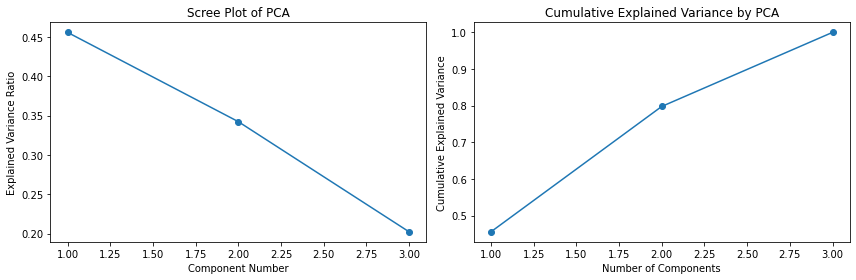

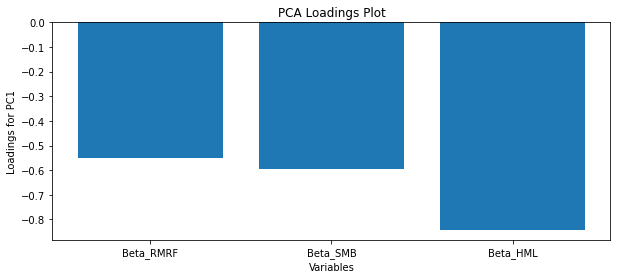

C:\Users\Darren\AppData\Local\Temp/ipykernel_11844/376014194.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Darren\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


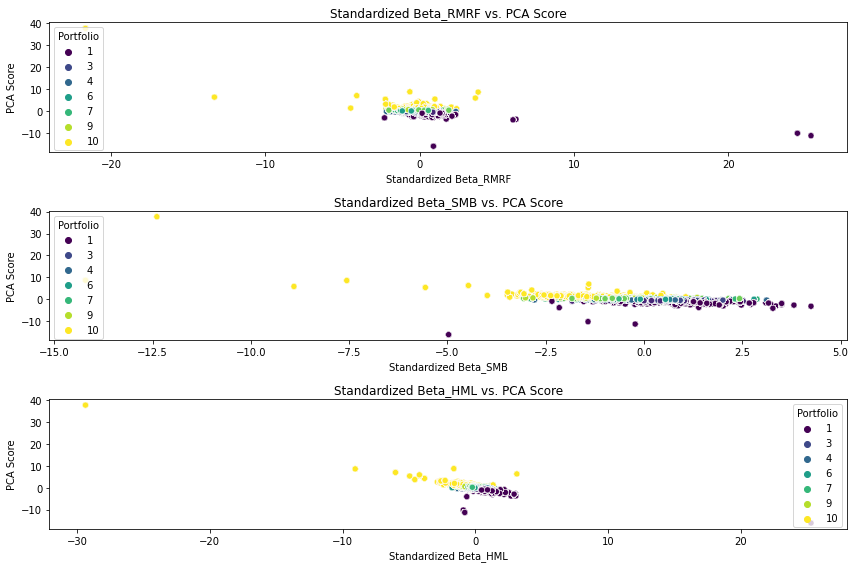

In [32]:
# Distinguish final period
final_period_data = weekly_returns[(weekly_returns['trading_week'] >= '2021-01') & (weekly_returns['trading_week'] <= '2022-52')].copy()

# Apply PCA and visualize the results
final_period_data = apply_pca_to_betas(final_period_data)

In [33]:
final_period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,MarkettypeID,RiskPremium1,SMB1,HML1,trading_date_yw,risk_free_return,week_year,stock_excess_return,market_excess_return,Beta_RMRF,Beta_SMB,Beta_HML,PCA_Score,Portfolio
201,1,2021-02,0.026370,4,-0.019588,P9703,-0.019865,-0.006513,0.006394,2021-01-15,0.000504,2021-02,0.025866,-0.020092,0.825249,-1.684909,1.607597,0.427573,8
202,1,2021-03,0.057935,4,-0.013581,P9703,0.024618,0.004084,-0.014486,2021-01-22,0.000554,2021-03,0.057381,-0.014135,0.825249,-1.684909,1.607597,0.427573,8
203,1,2021-04,0.049048,4,0.018125,P9703,-0.042016,0.004352,-0.003709,2021-01-29,0.000558,2021-04,0.048490,0.017567,0.825249,-1.684909,1.607597,0.427573,8
204,1,2021-05,0.048116,4,-0.042990,P9703,0.000868,-0.031227,-0.011932,2021-02-05,0.000546,2021-05,0.047570,-0.043536,0.825249,-1.684909,1.607597,0.427573,8
205,1,2021-06,0.079688,4,-0.030278,P9703,0.053851,-0.021395,-0.010592,2021-02-12,0.000553,2021-06,0.079135,-0.030832,0.825249,-1.684909,1.607597,0.427573,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835969,603999,2022-47,0.021484,1,0.010169,P9701,0.011153,-0.016554,0.044766,2022-11-26,0.000444,2022-47,0.021040,0.009725,1.115106,0.942827,0.639333,-1.054626,1
835970,603999,2022-48,0.005736,1,-0.009893,P9701,0.016161,0.009937,-0.024400,2022-12-03,0.000471,2022-48,0.005265,-0.010364,1.115106,0.942827,0.639333,-1.054626,1
835971,603999,2022-49,0.043726,1,0.028340,P9701,0.018248,-0.021064,-0.003514,2022-12-10,0.000477,2022-49,0.043249,0.027863,1.115106,0.942827,0.639333,-1.054626,1
835972,603999,2022-50,-0.023679,1,0.003581,P9701,-0.009908,-0.005379,-0.004614,2022-12-17,0.000459,2022-50,-0.024138,0.003122,1.115106,0.942827,0.639333,-1.054626,1


In [34]:
# Construct cross sectional portfolio
cross_sect_portfolio_returns = final_period_data.groupby(['trading_week', 'Portfolio']).apply(
    lambda x: (x['return_without_cash_dividend']).mean() - x['risk_free_return'].mean()
).reset_index(name='portfolio_return')
cross_sect_portfolio_returns

,trading_week,Portfolio,portfolio_return
0,2021-02,1,-0.032364
1,2021-02,2,-0.027901
2,2021-02,3,-0.033004
3,2021-02,4,-0.023786
4,2021-02,5,-0.023372
...,...,...,...
955,2022-51,6,-0.014097
956,2022-51,7,-0.009808
957,2022-51,8,-0.015799
958,2022-51,9,-0.005822


In [35]:
# Group portfolios
cross_sect_portfolio_returns = cross_sect_portfolio_returns.groupby(["Portfolio"]).mean()
cross_sect_portfolio_returns

C:\Users\Darren\AppData\Local\Temp/ipykernel_11844/502204717.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cross_sect_portfolio_returns = cross_sect_portfolio_returns.groupby(["Portfolio"]).mean()


,portfolio_return
Portfolio,
1,0.003284
2,0.004058
3,0.004028
4,0.003148
5,0.003923
6,0.003251
7,0.003492
8,0.002847
9,0.002293


In [36]:
# Fit the model
X = sm.add_constant(results_df["βp"].values)
Y = cross_sect_portfolio_returns["portfolio_return"].values
model = sm.OLS(Y, X).fit()

In [37]:
# Initialize empty result list
results = []

# Define parameters
alpha = model.params[0]
beta = model.params[1]
t_alpha = model.tvalues[0]
t_beta = model.tvalues[1]
p_alpha = model.pvalues[0]
p_beta = model.pvalues[1]
r_squared = model.rsquared

# Append to result list
results.append({
        'alpha': alpha,
        't_alpha': t_alpha,
        'p_alpha': p_alpha,
        'beta': beta,
        't_beta': t_beta,
        'p_beta': p_beta,
        'R_squared': r_squared
    })

# Convert result into a dataframe
final_result = pd.DataFrame(results)
final_result.rename(columns={
    'alpha': 'γ0',
    't_alpha': 't-value γ0',
    'p_alpha': 'Sign. γ0',
    'beta': 'γ1',
    't_beta': 't-value γ1',
    'p_beta': 'Sign. γ1',
    'R_squared': 'R²'
}, inplace=True)

In [38]:
final_result

,γ0,t-value γ0,Sign. γ0,γ1,t-value γ1,Sign. γ1,R²
0,-0.005756,-1.624078,0.143014,0.008934,2.515022,0.036087,0.441549


In [39]:
# Specify the directory
folder_name = 'results'
file_name = 'FF3_third_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
final_result.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\FF3_third_regression.csv' successfully.
